<a href="https://colab.research.google.com/github/parth-ds/Brainwave_Matrix_Intern/blob/main/social_media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/twitter_training.csv')
df=pd.read_csv('/content/twitter_validation.csv')
df.head()


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df.isnull().sum()

,0
3364,0
Facebook,0
Irrelevant,0
"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [ ]:
df.columns = ['id', 'Entity', 'Sentiment', 'Tweet']
print(df.columns)

Index(['id', 'Entity', 'Sentiment', 'Tweet'], dtype='object')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):  # 🔐 Skip non-string values
        return ""

    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    text = " ".join(
        [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    )
    return text



df['clean_text'] = df['Tweet'].apply(clean_text)
df[['Tweet', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Tweet,clean_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
1,@Microsoft Why do I pay for WORD when it funct...,pay word function poorly chromebook
2,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,Now the President is slapping Americans in the...,president slapping american face really commit...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past 13 year li...


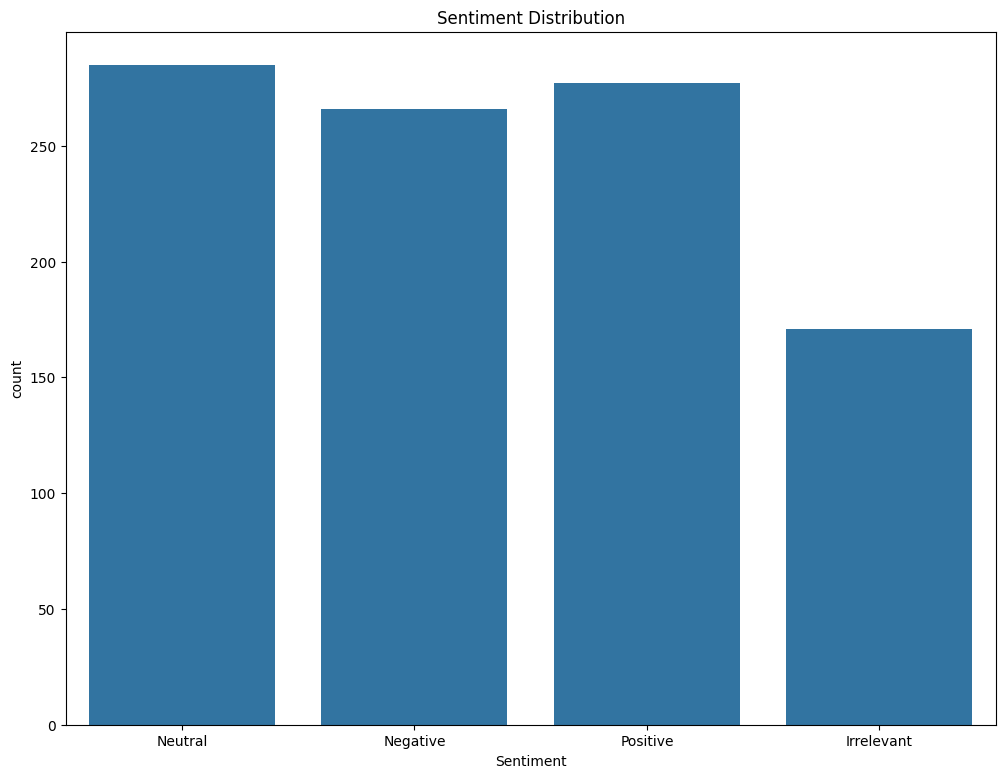

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

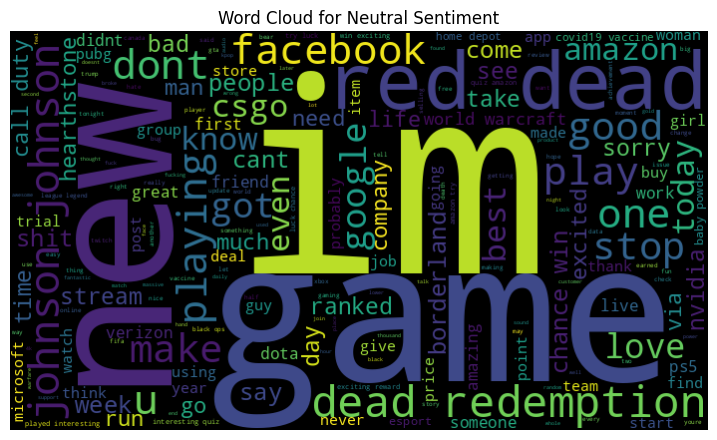

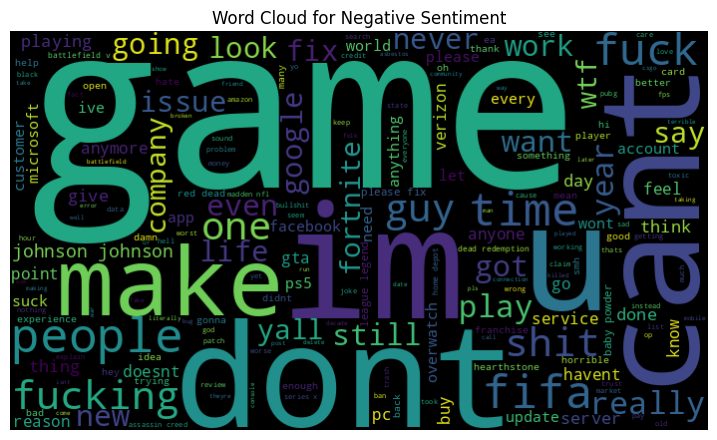

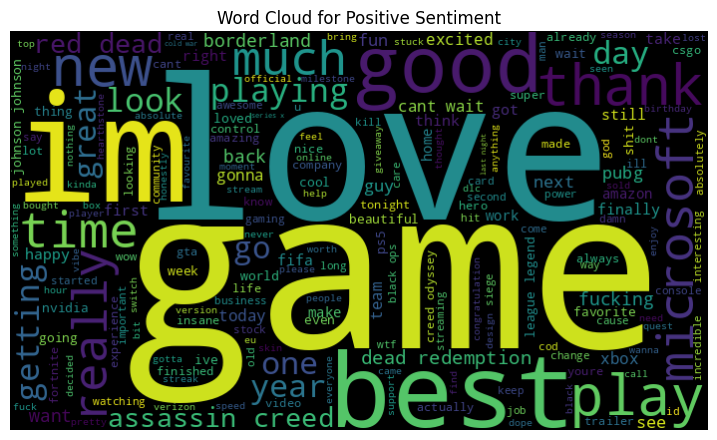

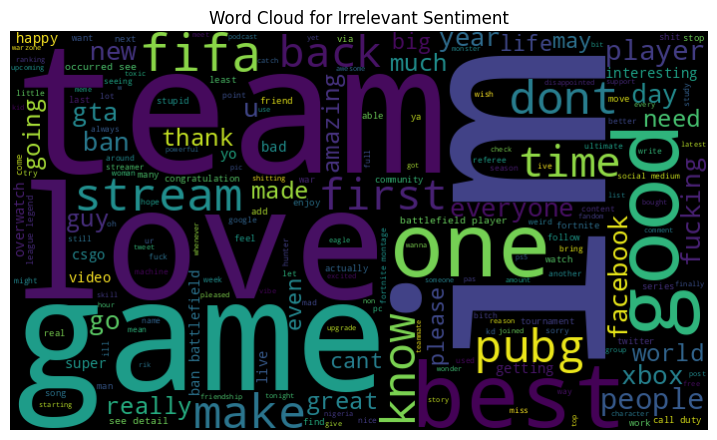

In [ ]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=700, height=400).generate(text)
    plt.figure(figsize=(9,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_encoded)
y_pred_encoded = model.predict(X_test)

# Inverse transform predictions for evaluation report
y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)


print(confusion_matrix(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))

[[ 3  8 10 16]
 [ 0 31 14  7]
 [ 1 11 37 10]
 [ 1  9 13 29]]
              precision    recall  f1-score   support

  Irrelevant       0.60      0.08      0.14        37
    Negative       0.53      0.60      0.56        52
     Neutral       0.50      0.63      0.56        59
    Positive       0.47      0.56      0.51        52

    accuracy                           0.50       200
   macro avg       0.52      0.47      0.44       200
weighted avg       0.52      0.50      0.47       200



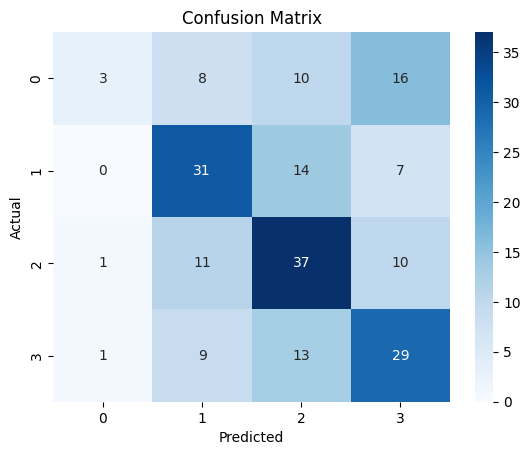

In [ ]:
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming y_encoded and the train/test split (X_train, X_test, y_train_encoded, y_test_encoded, y_test_labels) are already defined

rf = RandomForestClassifier()
rf.fit(X_train, y_train_encoded) # Train on encoded labels
y_pred_encoded_rf = rf.predict(X_test)

# Inverse transform for evaluation report
y_pred_labels_rf = le.inverse_transform(y_pred_encoded_rf)


print(classification_report(y_test_labels, y_pred_labels_rf))

              precision    recall  f1-score   support

  Irrelevant       0.46      0.16      0.24        37
    Negative       0.43      0.62      0.50        52
     Neutral       0.51      0.36      0.42        59
    Positive       0.41      0.56      0.47        52

    accuracy                           0.44       200
   macro avg       0.45      0.42      0.41       200
weighted avg       0.45      0.44      0.42       200



In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Assuming y_encoded and the train/test split (X_train, X_test, y_train_encoded, y_test_encoded, y_test_labels) are already defined

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded) # Train on encoded labels

y_pred_encoded_xgb = xgb_model.predict(X_test)
y_pred_labels_xgb = le.inverse_transform(y_pred_encoded_xgb)


print(classification_report(y_test_labels, y_pred_labels_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

  Irrelevant       0.27      0.19      0.22        37
    Negative       0.41      0.42      0.42        52
     Neutral       0.45      0.53      0.48        59
    Positive       0.45      0.44      0.45        52

    accuracy                           0.41       200
   macro avg       0.39      0.39      0.39       200
weighted avg       0.41      0.41      0.41       200



In [ ]:
!pip install transformers datasets --quiet
!pip install accelerate --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
joblib.dump(model,"sentiment_model.pkl")

['sentiment_model.pkl']

/tmp/ipython-input-1197365708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Entity', order=df['Entity'].value_counts().index, palette='viridis')


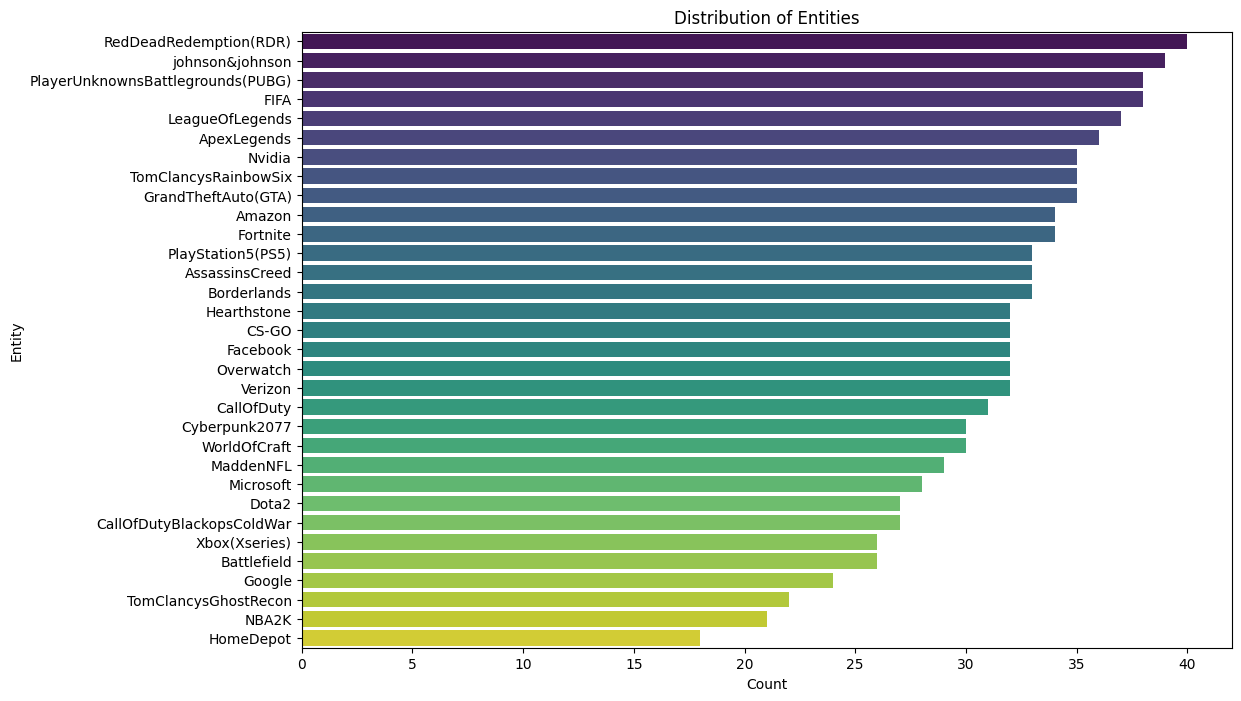

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Entity', order=df['Entity'].value_counts().index, palette='viridis')
plt.title('Distribution of Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

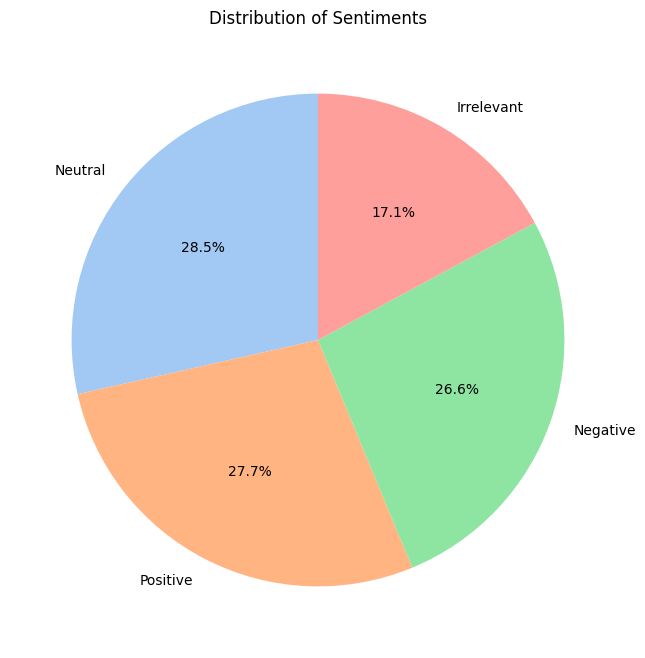

In [ ]:
plt.figure(figsize=(8, 8))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sentiments')
plt.ylabel('')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Assuming X_test, y_test_labels, le, model, rf, xgb_model are already defined
# Assuming the models are trained on encoded labels and predict encoded labels

# Get classification reports as dictionaries, using inverse transformed predictions and test labels
lr_report = classification_report(y_test_labels, le.inverse_transform(model.predict(X_test)), output_dict=True)
rf_report = classification_report(y_test_labels, le.inverse_transform(rf.predict(X_test)), output_dict=True)
xgb_report = classification_report(y_test_labels, le.inverse_transform(xgb_model.predict(X_test)), output_dict=True)


# Create DataFrames from reports and combine them
lr_df = pd.DataFrame(lr_report).transpose().reset_index().rename(columns={'index': 'Sentiment'})
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_report).transpose().reset_index().rename(columns={'index': 'Sentiment'})
rf_df['Model'] = 'Random Forest'

xgb_df = pd.DataFrame(xgb_report).transpose().reset_index().rename(columns={'index': 'Sentiment'})
xgb_df['Model'] = 'XGBoost'

combined_report_df = pd.concat([lr_df, rf_df, xgb_df])

# Filter out rows that are not sentiment classes (like accuracy, macro avg, weighted avg)
combined_report_df = combined_report_df[combined_report_df['Sentiment'].isin(['Irrelevant', 'Negative', 'Neutral', 'Positive'])]

display(combined_report_df)

,Sentiment,precision,recall,f1-score,support,Model
0,Irrelevant,0.600000,0.081081,0.142857,37.0,Logistic Regression
1,Negative,0.525424,0.596154,0.558559,52.0,Logistic Regression
2,Neutral,0.500000,0.627119,0.556391,59.0,Logistic Regression
3,Positive,0.467742,0.557692,0.508772,52.0,Logistic Regression
0,Irrelevant,0.461538,0.162162,0.240000,37.0,Random Forest
1,Negative,0.426667,0.615385,0.503937,52.0,Random Forest
2,Neutral,0.512195,0.355932,0.420000,59.0,Random Forest
3,Positive,0.408451,0.557692,0.471545,52.0,Random Forest
0,Irrelevant,0.269231,0.189189,0.222222,37.0,XGBoost
1,Negative,0.407407,0.423077,0.415094,52.0,XGBoost
